In [1]:
import os
import time

import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import cv2

from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [10]:
# 載入訓練好的權重
parameters_filePath = os.path.join("car", "dataset", "dataset64_9_Layers_64x8.npy")
npload = np.load(parameters_filePath)
parameters = npload.item()

In [11]:
del npload

In [12]:
# 測試

parameters.keys()

dict_keys(['W6', 'b5', 'b2', 'b1', 'b6', 'W8', 'b4', 'b8', 'W5', 'b7', 'W4', 'W2', 'W1', 'b3', 'W7', 'W3', 'W9', 'b9'])

In [13]:
# 測試
parameters['W1']

array([[-0.00453918, -0.00723144,  0.01448242, ..., -0.00500067,
         0.0066093 ,  0.00393351],
       [ 0.01762287, -0.00722738, -0.01132686, ...,  0.00077643,
         0.0027952 ,  0.0007889 ],
       [ 0.02821689,  0.00445479,  0.00654377, ...,  0.01006686,
        -0.00510137, -0.00631144],
       ..., 
       [ 0.00110117,  0.02160391, -0.00089717, ...,  0.01837925,
         0.00507781,  0.01059725],
       [-0.00482642, -0.00862018,  0.02138415, ...,  0.00816279,
         0.00159102,  0.00349565],
       [ 0.01306325,  0.03080036,  0.00525631, ..., -0.01003955,
        -0.00745949, -0.00663319]])

In [14]:
my_label_y = [0] # the true class of your image (1 -> car, 0 -> non-car)
num_px = 64

dirPath = os.path.join("car", "test_dnn_0") # test_dnn_0 test_dnn_images
listDir = os.listdir(dirPath)
listfileName = []
listCost = []
for image in listDir:
    test_filePath = os.path.join(dirPath, image)
    if os.path.isfile(test_filePath):
        image_load = cv2.imread(test_filePath)
        image_load = cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB)
        my_image = cv2.resize(image_load, (num_px, num_px), interpolation=cv2.INTER_LINEAR)
        my_image = my_image.reshape(num_px * num_px * 3, 1)
        my_image = my_image/255.
        my_predicted_image = predict(my_image, my_label_y, parameters)
        listfileName.append(image)
        listCost.append(my_predicted_image.item())
        #plt.imshow(image)
        #print ("y = " + str(np.squeeze(my_predicted_image)) )
    else:
        print("找不到 {} 檔案！！".format(my_image))

[[ 0.07826296]]
Accuracy: 1.0
[[ 0.05869539]]
Accuracy: 1.0
[[ 0.15466562]]
Accuracy: 1.0
[[ 0.02943207]]
Accuracy: 1.0
[[ 0.5669804]]
Accuracy: 0.0
[[ 0.05147138]]
Accuracy: 1.0
[[ 0.00794562]]
Accuracy: 1.0
[[ 0.01418982]]
Accuracy: 1.0
[[ 0.05252011]]
Accuracy: 1.0
[[ 0.15032706]]
Accuracy: 1.0
[[ 0.07148676]]
Accuracy: 1.0
[[ 0.00339558]]
Accuracy: 1.0
[[ 0.03852182]]
Accuracy: 1.0
[[ 0.0037924]]
Accuracy: 1.0
[[ 0.0124042]]
Accuracy: 1.0
[[ 0.15327983]]
Accuracy: 1.0
[[ 0.42850896]]
Accuracy: 1.0
[[ 0.04710173]]
Accuracy: 1.0
[[ 0.02616855]]
Accuracy: 1.0
[[ 0.10986494]]
Accuracy: 1.0
[[ 0.03319814]]
Accuracy: 1.0
[[ 0.00057799]]
Accuracy: 1.0
[[ 0.80578573]]
Accuracy: 0.0
[[ 0.06100283]]
Accuracy: 1.0
[[ 0.01875]]
Accuracy: 1.0
[[ 0.09664245]]
Accuracy: 1.0
[[ 0.05037854]]
Accuracy: 1.0
[[ 0.0088125]]
Accuracy: 1.0
[[ 0.01928042]]
Accuracy: 1.0
[[ 0.00294384]]
Accuracy: 1.0
[[ 0.0202144]]
Accuracy: 1.0
[[ 0.01207726]]
Accuracy: 1.0
[[ 0.11515167]]
Accuracy: 1.0
[[ 0.02385406]]
Ac

In [15]:
sum = 0
for i in range(len(listCost)):
    print("file:{:18} \t Cost:{} ".format(listfileName[i], listCost[i]))
    sum += listCost[i]

file:n00464478_13619.jpg 	 Cost:0.0 
file:n00464478_11552.jpg 	 Cost:0.0 
file:n00523513_26401.jpg 	 Cost:0.0 
file:n00470830_7355.jpg 	 Cost:0.0 
file:n00476389_6639.jpg 	 Cost:1.0 
file:n00450866_2510.jpg 	 Cost:0.0 
file:n00466630_153.jpg  	 Cost:0.0 
file:n00483205_2655.jpg 	 Cost:0.0 
file:n01317916_11016.jpg 	 Cost:0.0 
file:n00453313_3107.jpg 	 Cost:0.0 
file:n00454395_11619.jpg 	 Cost:0.0 
file:n01318894_8149.jpg 	 Cost:0.0 
file:n01315805_2023.jpg 	 Cost:0.0 
file:n00466377_9838.jpg 	 Cost:0.0 
file:n00453126_131.jpg  	 Cost:0.0 
file:n01315213_2274.jpg 	 Cost:0.0 
file:n00476235_8391.jpg 	 Cost:0.0 
file:n00466524_9747.jpg 	 Cost:0.0 
file:n00449977_5027.jpg 	 Cost:0.0 
file:n00466273_5544.jpg 	 Cost:0.0 
file:n00454493_7462.jpg 	 Cost:0.0 
file:n00475787_11580.jpg 	 Cost:0.0 
file:n00887544_1391.jpg 	 Cost:1.0 
file:n00468480_4575.jpg 	 Cost:0.0 
file:n00467719_4494.jpg 	 Cost:0.0 
file:n01317089_11994.jpg 	 Cost:0.0 
file:n00475014_4105.jpg 	 Cost:0.0 
file:n00475014_5039.j

In [16]:
sum / len(listCost) # 1

0.07142857142857142

In [17]:
1 - (sum / len(listCost)) # 0

0.9285714285714286

[[ 0.00146678]]
Accuracy: 0.0
y = 0.0


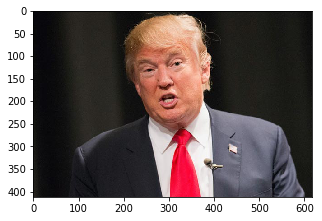

In [18]:
image = "Donald-Trump.jpg"
dirPath = os.path.join("car", "test_dnn_images") # test_dnn_0 test_dnn_images
my_label_y = [1] # the true class of your image (1 -> car, 0 -> non-car)
num_px = 64
test_filePath = os.path.join(dirPath, image)
if os.path.isfile(test_filePath):
    image_load = cv2.imread(test_filePath)
    image_load = cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB)
    my_image = cv2.resize(image_load, (num_px, num_px), interpolation=cv2.INTER_LINEAR)
    my_image = my_image.reshape(num_px * num_px * 3, 1)
    my_image = my_image/255.
    my_predicted_image = predict(my_image, my_label_y, parameters)
    plt.imshow(image_load)
else:
    print("找不到 {} 檔案！！".format(image))